In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import operator 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


## Reading the Dataset.

In [62]:
df = pd.read_csv("final_data.csv")


df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


##age

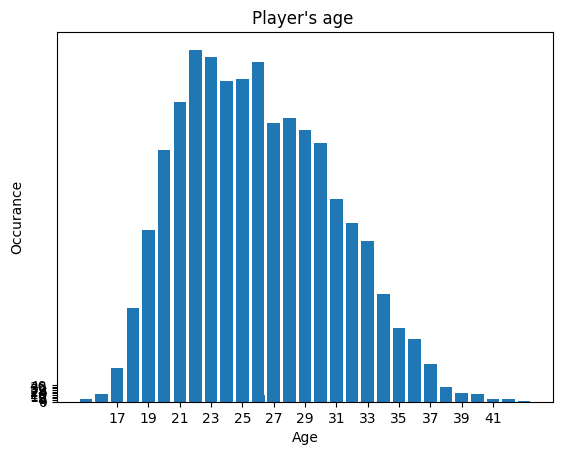

In [63]:
h = df["age"]
cnt = Counter(h)

## Sorting the items in the dictionary in accesseding order.
sort_cnt = sorted(cnt.items())
sort_cnt_dict = dict(sort_cnt)

## Seprating the keys and values into another variable.
keys = sort_cnt_dict.keys()
values = sort_cnt_dict.values()

plt.bar(keys, values, width = 0.8)
plt.title("Player's age ")
plt.xlabel("Age")
plt.ylabel("Occurance")

plt.xticks([17,19,21,23,25,27,29,31,33,35,37,39,41])
plt.yticks([0,4,8,12,16,20,24,28,32,36,40])

plt.show()

##pice from age

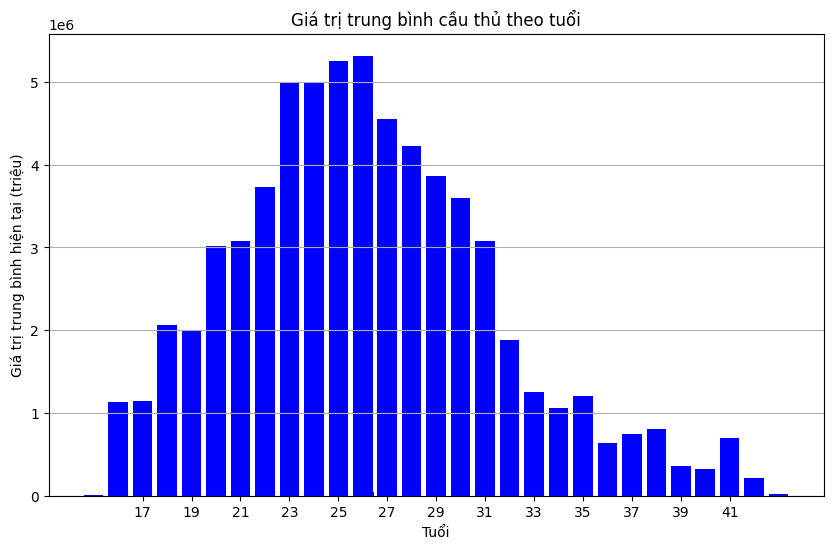

In [64]:
# Tính giá trị trung bình theo tuổi
average_values = df.groupby('age')['current_value'].mean().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(average_values['age'], average_values['current_value'], color='blue')

# Thiết lập nhãn
plt.title('Giá trị trung bình cầu thủ theo tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Giá trị trung bình hiện tại (triệu)')

# Thiết lập các nhãn tuổi
plt.xticks([17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41])

plt.grid(axis='y')

# Hiển thị biểu đồ
plt.show()



## train 

In [65]:
# Xem một vài dòng đầu tiên
print(df.head())

# Chọn các đặc trưng đầu vào (features) và nhãn (target)
features = df[['age', 'appearance', 'goals', 'assists', 
                 'yellow cards', 'goals conceded', 'clean sheets', 
                 'minutes played', 'highest_value', 'games_injured']]
target = df['current_value']
# Chia dữ liệu thành tập train và test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

                                     player               team  \
0        /david-de-gea/profil/spieler/59377  Manchester United   
1       /jack-butland/profil/spieler/128899  Manchester United   
2          /tom-heaton/profil/spieler/34130  Manchester United   
3  /lisandro-martinez/profil/spieler/480762  Manchester United   
4     /raphael-varane/profil/spieler/164770  Manchester United   

                name              position  height   age  appearance  \
0       David de Gea            Goalkeeper   189.0  32.0         104   
1       Jack Butland            Goalkeeper   196.0  30.0          15   
2         Tom Heaton            Goalkeeper   188.0  37.0           4   
3  Lisandro Martínez  Defender Centre-Back   175.0  25.0          82   
4     Raphaël Varane  Defender Centre-Back   191.0  30.0          63   

      goals   assists  yellow cards  ...  goals conceded  clean sheets  \
0  0.000000  0.000000      0.009585  ...        1.217252      0.335463   
1  0.000000  0.000000 

## hồi quy tuyến tính

Mean Squared Error: 248088905165024.62
R^2 Score: -1.7432937622070312


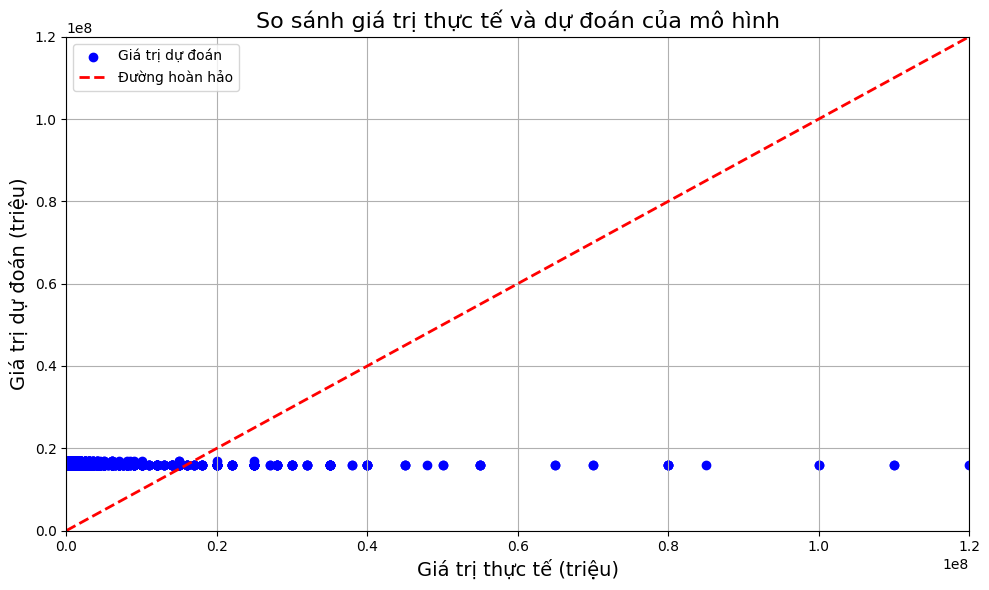

In [66]:
# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá trị
y_pred = model.predict(X_test)




# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


# Lưu mô hình
# with open('linear_regression_model.pkl', 'wb') as file:
#     pickle.dump(model, file)

# Vẽ biểu đồ so sánh giá trị thực và dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Giá trị dự đoán')

# Lấy các giá trị min và max từ y_test
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# Vẽ đường hoàn hảo kéo dài hết biểu đồ
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Đường hoàn hảo')  # Đường y=x

# Thiết lập nhãn
plt.title('So sánh giá trị thực tế và dự đoán của mô hình', fontsize=16)
plt.xlabel('Giá trị thực tế (triệu)', fontsize=14)
plt.ylabel('Giá trị dự đoán (triệu)', fontsize=14)
plt.legend()
plt.grid()

# Thiết lập giới hạn cho trục
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## dùng XGBoost

Mean Squared Error: 7373661590281.069
R^2 Score: 0.9184642434120178


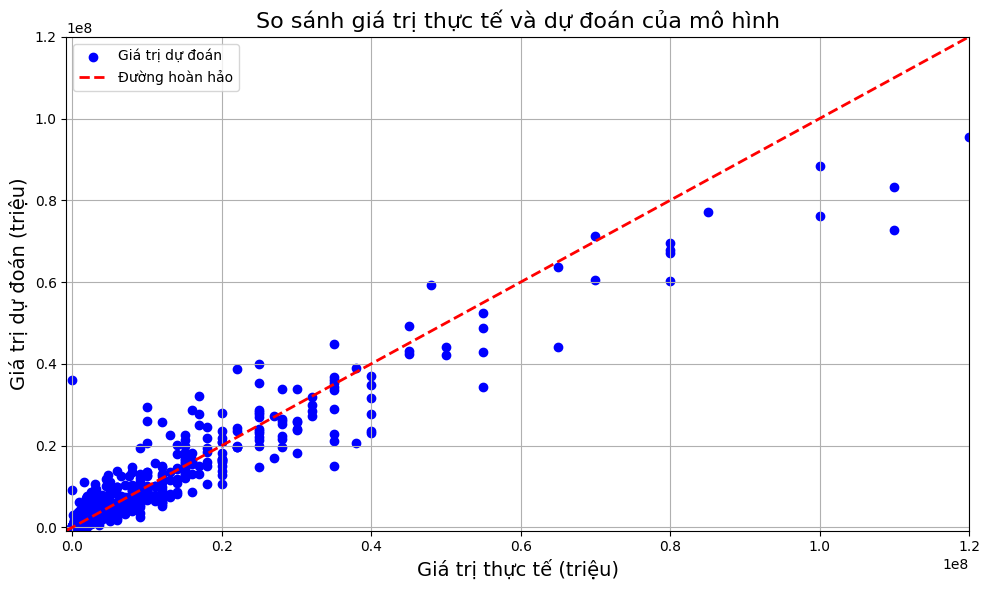

In [67]:
# Khởi tạo tham số cho XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Tìm kiếm tham số tối ưu với RandomizedSearchCV
xgb = XGBRegressor(random_state=42, tree_method='hist')
xgb_search = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=50, cv=5, n_jobs=-1, random_state=42)
xgb_search.fit(X_train, y_train)

# # Lưu mô hình đã tối ưu với pickle
best_xgb_model = xgb_search.best_estimator_
# with open('optimized_xgb_model.pkl', 'wb') as f:
#     pickle.dump(best_xgb_model, f)



# Đánh giá mô hình
y_pred = best_xgb_model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


# Vẽ biểu đồ so sánh giá trị thực và dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Giá trị dự đoán')

# Lấy các giá trị min và max từ y_test
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# Vẽ đường hoàn hảo kéo dài hết biểu đồ
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Đường hoàn hảo')  # Đường y=x

# Thiết lập nhãn
plt.title('So sánh giá trị thực tế và dự đoán của mô hình', fontsize=16)
plt.xlabel('Giá trị thực tế (triệu)', fontsize=14)
plt.ylabel('Giá trị dự đoán (triệu)', fontsize=14)
plt.legend()
plt.grid()

# Thiết lập giới hạn cho trục
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## kết quả test hồi quy

In [68]:
# new_player = [[30, 15, 0, 0, 0, 1.24, 0.33, 9390, 70000000, 42]]  # Chỉnh theo dữ liệu mẫu
new_player = [[32, 104, 0, 0, 0.009584665, 1.217252396, 0.335463259,9390, 70000000, 5]] 
predicted_value = model.predict(new_player)

print(f'Giá trị dự đoán của cầu thủ mới: {predicted_value[0]} triệu euro')
new_player_data = pd.DataFrame({
    'age': [41],  # Thay đổi theo cầu thủ mới
    'appearance': [104],
    'goals': [0],
    'assists': [0],
    'yellow cards': [0.009584665],
    'goals conceded': [1.217252396],
    'clean sheets': [0.335463259],
    'minutes played': [9390],
    'highest_value': [70000000],
    'games_injured': [5]
})

predicted_value = model.predict(new_player_data)
print(f'Giá trị dự đoán của cầu thủ mới: {predicted_value[0]}')



Giá trị dự đoán của cầu thủ mới: 41917619.98681138 triệu euro
Giá trị dự đoán của cầu thủ mới: 39290093.4031241


C:\Users\nguye\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# kết quả test XGBoost

In [69]:
# new_player = [[30, 15, 0, 0, 0, 1.24, 0.33, 9390, 70000000, 42]]  # Chỉnh theo dữ liệu mẫu
new_player = [[32, 104, 0, 0, 0.009584665, 1.217252396, 0.335463259,9390, 70000000, 5]] 
predicted_value = best_xgb_model.predict(new_player)

print(f'Giá trị dự đoán của cầu thủ mới: {predicted_value[0]} triệu euro')
new_player_data = pd.DataFrame({
    'age': [41],  # Thay đổi theo cầu thủ mới
    'appearance': [104],
    'goals': [0],
    'assists': [0],
    'yellow cards': [0.009584665],
    'goals conceded': [1.217252396],
    'clean sheets': [0.335463259],
    'minutes played': [9390],
    'highest_value': [70000000],
    'games_injured': [5]
})

predicted_value = best_xgb_model.predict(new_player_data)
print(f'Giá trị dự đoán của cầu thủ mới: {predicted_value[0]} triệu euro')

Giá trị dự đoán của cầu thủ mới: 21364618.0 triệu euro
Giá trị dự đoán của cầu thủ mới: 15745927.0 triệu euro


# test


In [70]:
# # Giả định dữ liệu đã được huấn luyện
# data_train = {
#     'age': [30, 31, 32],
#     'appearance': [100, 101, 104],
#     'goals': [0, 0, 0],
#     'assists': [0, 0, 0],
#     'yellow cards': [0.0, 0.0, 0.009584665],
#     'goals conceded': [1.0, 1.2, 1.217252396],
#     'clean sheets': [0.3, 0.35, 0.335463259],
#     'minutes played': [9000, 9100, 9390],
#     'highest_value': [60000000, 65000000, 70000000],
#     'games_injured': [5, 5, 5],
#     'current_value': [15000000, 16000000, 17000000]
# }

# df_train = pd.DataFrame(data_train)

# df_train = pd.DataFrame(data_train)

# # Chọn các đặc trưng đầu vào (features) và nhãn (target)
# features = df_train[['age', 'appearance', 'goals', 'assists', 
#                      'yellow cards', 'goals conceded', 'clean sheets', 
#                      'minutes played', 'highest_value', 'games_injured']]
# target = df_train['current_value']

# # Chia dữ liệu thành tập train và test (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # Khởi tạo mô hình XGBoost
# best_xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# # Đào tạo mô hình
# best_xgb_model.fit(X_train, y_train)

# # Dự đoán trên tập test
# y_pred = best_xgb_model.predict(X_test)

# # Đánh giá mô hình
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'R^2 Score: {r2}')